In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
bitcoin = pd.DataFrame()

In [3]:
bitcoin = pd.read_csv('Bitcoin_DailyPrice.csv', parse_dates=['Date'])

In [4]:
bitcoin.head()

,Date,Close Price
0,2010-07-18,0.09
1,2010-07-19,0.08
2,2010-07-20,0.07
3,2010-07-21,0.08
4,2010-07-22,0.05


In [5]:
bitcoin.set_index('Date', inplace=True)
bitcoin.head()

,Close Price
Date,
2010-07-18,0.09
2010-07-19,0.08
2010-07-20,0.07
2010-07-21,0.08
2010-07-22,0.05


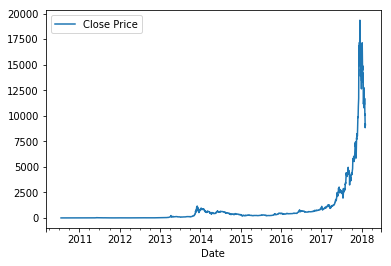

In [6]:
bitcoin.plot(y='Close Price')

In [7]:
sp500 = pd.read_csv('SP500_DailyIndex.csv', parse_dates=['Date'])

In [8]:
sp500.head()

,Date,Adj Close
0,2010-07-19,1071.250000
1,2010-07-20,1083.479980
2,2010-07-21,1069.589966
3,2010-07-22,1093.670044
4,2010-07-23,1102.660034


In [9]:
sp500.set_index('Date', inplace=True)

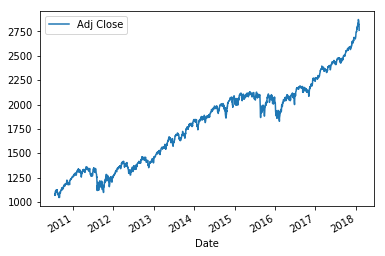

In [10]:
sp500.plot(y='Adj Close')

In [11]:
start='2010-07-18'
end = '2018-02-04'

In [12]:
SP = wb.DataReader('^GSPC', data_source='yahoo', start=start, end=end)['Adj Close']

In [13]:
SP = pd.DataFrame(SP)

In [14]:
len(bitcoin)

2759

In [15]:
len(sp500)

1901

In [16]:
df = bitcoin.join(sp500)
#pd.merge(bitcoin, sp500,how='left',on=['Date'])

In [17]:
# using merge method
# sp500.merge(bitcoin, how='left', left_index=True, right_index=True)

In [18]:
df.dropna(inplace=True)

In [19]:
df.columns = ['bitcoin','sp500']

In [20]:
# calculating daily return
returns = (df / df.shift(1))-1              # .shift(1) : previous day

In [21]:
returns.head()

,bitcoin,sp500
Date,,
2010-07-19,NaN,NaN
2010-07-20,-0.125000,0.011417
2010-07-21,0.142857,-0.012820
2010-07-22,-0.375000,0.022513
2010-07-23,0.200000,0.008220


In [22]:
# slice data of only you need

returns = returns.loc['2010-07-20':'2017-12-29']

In [23]:
returns.tail()

,bitcoin,sp500
Date,,
2017-12-22,-0.109498,-0.000458
2017-12-26,0.136256,-0.001058
2017-12-27,-0.023307,0.000791
2017-12-28,-0.061744,0.001834
2017-12-29,-0.000062,-0.005183


In [24]:
# calculate the mean of each column

returns[['sp500', 'bitcoin']].mean()          # we could've used returns.mean()  since its every column

sp500      0.000528
bitcoin    0.008714
dtype: float64

In [25]:
# annualized return = daily return* trading days in a year

returns[['sp500', 'bitcoin']].mean() * 250

sp500      0.131882
bitcoin    2.178438
dtype: float64

In [26]:
# annualized std = daily std * sqrt(tading days in a year)

returns.std()*(250**0.5)

bitcoin    1.076644
sp500      0.141557
dtype: float64

In [27]:
returns.corr()

,bitcoin,sp500
bitcoin,1.000000,0.037905
sp500,0.037905,1.000000


In [28]:
x = returns['sp500']
y = returns['bitcoin']

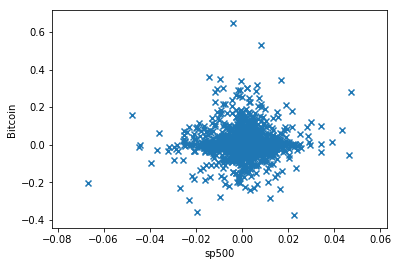

In [29]:
plt.scatter(x,y,marker='x')
plt.ylabel('Bitcoin')
plt.xlabel('sp500')
plt.show()

# Individual Assignment #3

### 1. Reading in Fama-French csv file

In [30]:
ff3 = pd.read_csv('FF3Factors_Daily.csv', parse_dates=['Date'])

In [31]:
ff3.set_index('Date', inplace = True)

In [32]:
ff3.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.24,-0.28,0.009
1926-07-02,0.45,-0.32,-0.08,0.009
1926-07-06,0.17,0.27,-0.35,0.009
1926-07-07,0.09,-0.59,0.03,0.009
1926-07-08,0.21,-0.36,0.15,0.009


### 2. Merging dataframes

In [33]:
returns.head()

,bitcoin,sp500
Date,,
2010-07-20,-0.125000,0.011417
2010-07-21,0.142857,-0.012820
2010-07-22,-0.375000,0.022513
2010-07-23,0.200000,0.008220
2010-07-26,0.000000,0.011200


In [34]:
returns = returns.join(ff3)

In [35]:
returns.head()

,bitcoin,sp500,Mkt-RF,SMB,HML,RF
Date,,,,,,
2010-07-20,-0.125000,0.011417,1.23,0.65,0.14,0.001
2010-07-21,0.142857,-0.012820,-1.30,-0.38,-0.41,0.001
2010-07-22,-0.375000,0.022513,2.37,1.25,0.54,0.001
2010-07-23,0.200000,0.008220,1.05,1.47,-0.23,0.001
2010-07-26,0.000000,0.011200,1.23,0.87,0.11,0.001


### 3. Computing excess returns for Bitcoin and SP500

In [36]:
returns['RF'] = returns['RF'] *0.01

In [37]:
returns['excess_bitcoin'] = returns['bitcoin'] - returns['RF']
returns['excess_sp500'] = returns['sp500'] - returns['RF']

### 4. Checking the time frame of the data

In [38]:
returns.head(3)

,bitcoin,sp500,Mkt-RF,SMB,HML,RF,excess_bitcoin,excess_sp500
Date,,,,,,,,
2010-07-20,-0.125000,0.011417,1.23,0.65,0.14,0.00001,-0.125010,0.011407
2010-07-21,0.142857,-0.012820,-1.30,-0.38,-0.41,0.00001,0.142847,-0.012830
2010-07-22,-0.375000,0.022513,2.37,1.25,0.54,0.00001,-0.375010,0.022503


In [39]:
returns.tail(3)

,bitcoin,sp500,Mkt-RF,SMB,HML,RF,excess_bitcoin,excess_sp500
Date,,,,,,,,
2017-12-27,-0.023307,0.000791,0.05,-0.13,-0.19,0.00004,-0.023347,0.000751
2017-12-28,-0.061744,0.001834,0.22,0.12,0.03,0.00004,-0.061784,0.001794
2017-12-29,-0.000062,-0.005183,-0.57,-0.31,0.02,0.00004,-0.000102,-0.005223


### 5. Mean, Standard Deviation, Shape Ration, Correlation

In [40]:
bit_mean = returns['excess_bitcoin'].mean()
bit_std = returns['excess_bitcoin'].std()
sp_mean = returns['excess_sp500'].mean()
sp_std = returns['excess_sp500'].std()
rf_mean = returns['RF'].mean()
bit_sharpe = (bit_mean - rf_mean) / bit_std
sp_sharpe = (sp_mean - rf_mean) / sp_std
print('bitcoin average return: ', bit_mean)
print('\nbitcoin standard deviation: ', bit_std)
print('\nbitcoin sharpe ratio: ', bit_sharpe)
print('\nsp500 average return: ', sp_mean)
print('\nsp500 standard deviation: ', sp_std)
print('\nsp500 sharpe ratio: ', sp_sharpe)
returns[['excess_bitcoin', 'excess_sp500']].corr()

bitcoin average return:  0.008707461913905838

bitcoin standard deviation:  0.06809262157538645

bitcoin sharpe ratio:  0.12778432901169615

sp500 average return:  0.000521235966491991

sp500 standard deviation:  0.008952661954507975

sp500 sharpe ratio:  0.057518536258923884


,excess_bitcoin,excess_sp500
excess_bitcoin,1.000000,0.037865
excess_sp500,0.037865,1.000000


### 6. Scatter Plot

Text(0.5,0,'SP500 Excess Return')

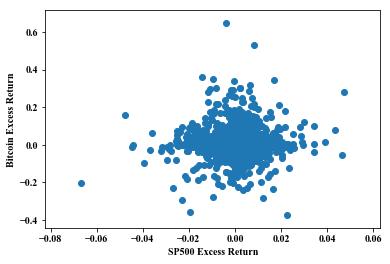

In [50]:
plt.scatter(returns['excess_sp500'], returns['excess_bitcoin'])
plt.rcParams["font.family"] = "Times New Roman"
plt.ylabel('Bitcoin Excess Return')
plt.xlabel('SP500 Excess Return')

### 7. Regression

In [42]:
X= returns['excess_sp500']
y= returns['excess_bitcoin']
regression = sm.OLS(X,y).fit()

In [43]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           excess_sp500   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.785
Date:                Sat, 10 Feb 2018   Prob (F-statistic):             0.0519
Time:                        19:34:43   Log-Likelihood:                 6187.4
No. Observations:                1877   AIC:                        -1.237e+04
Df Residuals:                    1876   BIC:                        -1.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
excess_bitcoin     0.0059      0.003      1.945      0.052   -4.75e-05       0.012
==============================================================================
Omnibus:                      251.845   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1901.933
Skew:                          -0.380   Prob(JB):                         0.00
Kurtosis:                       7.872   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
csfont = {'fontname':'Times New Roman'}